<a href="https://www.kaggle.com/code/itsnahm/machine-learning-model-for-customer-churn?scriptVersionId=109876115" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-customer-churn/train.csv
/kaggle/input/dataset-customer-churn/test.csv


# Hi everyone!
I'm just beginner as Data Science and want improve my career as Data Scientist in the future. This is project from my Data Science bootcamp lesson that I enrolled these weeks. I enrolled Data Science program by Binar Academy which is cooperate with Communication and Informatic Minister of Indonesia as program for freshgraduate people who want to build career in IT industry. 

A brief of this project is how to build machine learning model for customer churn in a provider. The prediction is important to know who customer is probably churn and the company can avoid customer churn with the prediction. 

In this project, given both dataset train and dataset test. Dataset train is given for make few machine learning models that best for this case. However, dataset test is given to implement in machine learning model and predict customer who is churn in the future. 

From Data Science bootcamp lesson these day, I learned how to explore dataset (EDA), make simple data visualization, data cleansing or wrangling, try machine learning model to train with cleaning dataset, choose the best machine learning model, and predict conclusion. 

In [2]:
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Declare both dataset train and dataset test on variables

In [3]:
train = pd.read_csv('../input/dataset-customer-churn/train.csv')
test = pd.read_csv('../input/dataset-customer-churn/test.csv')

# Exploratory Data Analysis
Check the common summary of dataset train

In [4]:
train.shape

(4250, 20)

In [5]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [7]:
train.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [8]:
train.duplicated().sum()

0

In [9]:
# Statistic description of numeric data
train.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


Check statistic of categorical columns

In [10]:
train['churn'].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'count')

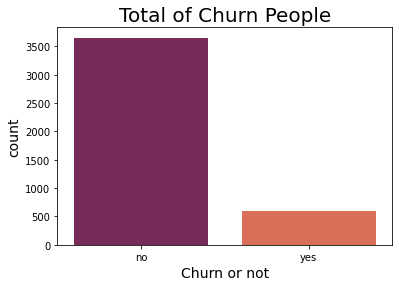

In [11]:
sns.countplot(train['churn'], palette = 'rocket')
plt.title('Total of Churn People', fontsize = 20)
plt.xlabel('Churn or not', fontsize = 14)
plt.ylabel('count', fontsize = 14)

From statistic and bar diagram above, can conclude that dataset train has imbalanced data in label or target variable. This case make machine learning model work overfitting. Overfitting is giving prediction result with majority of label which is 'no' in customer churn case like above. 

For this case above, we can handle this imbalancad data with oversampling or undersampling.

In [12]:
train['area_code'].value_counts()

area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='area_code', ylabel='count'>

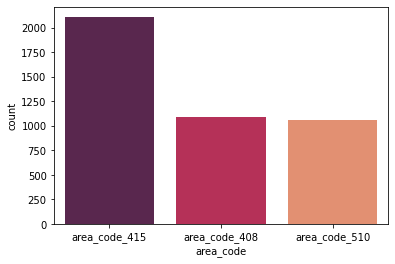

In [13]:
sns.countplot(train['area_code'], palette = 'rocket')

In [14]:
train['state'].value_counts()

WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NY     96
NJ     96
WY     95
OH     95
WI     94
MA     89
ME     89
CT     88
RI     87
MI     87
KS     87
MD     86
VT     86
KY     85
NV     83
IN     83
MS     82
WA     80
NC     80
MO     80
DE     80
CO     80
MT     80
IL     79
TN     79
NM     78
OK     78
NH     78
HI     77
AZ     77
FL     76
SD     75
NE     73
DC     72
SC     72
AR     71
LA     69
PA     67
ND     67
GA     64
IA     62
AK     61
CA     39
Name: state, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='state', ylabel='count'>

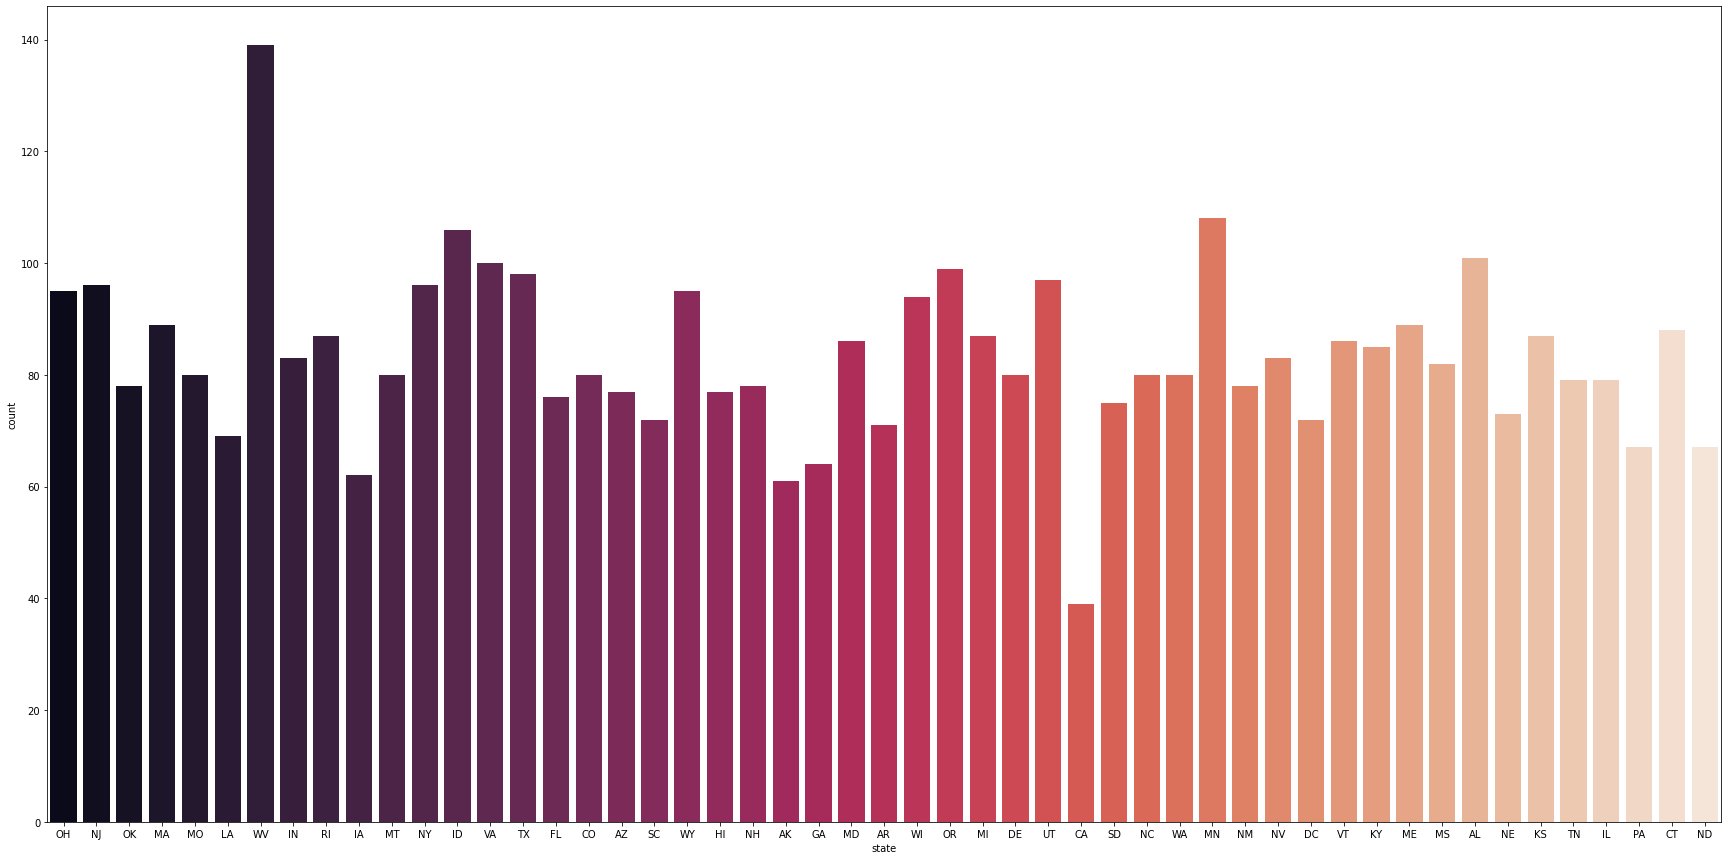

In [15]:
plt.rcParams['figure.figsize'] = (30,15)
sns.countplot(train['state'], palette = 'rocket')

In [16]:
train['international_plan'].value_counts()

no     3854
yes     396
Name: international_plan, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='international_plan', ylabel='count'>

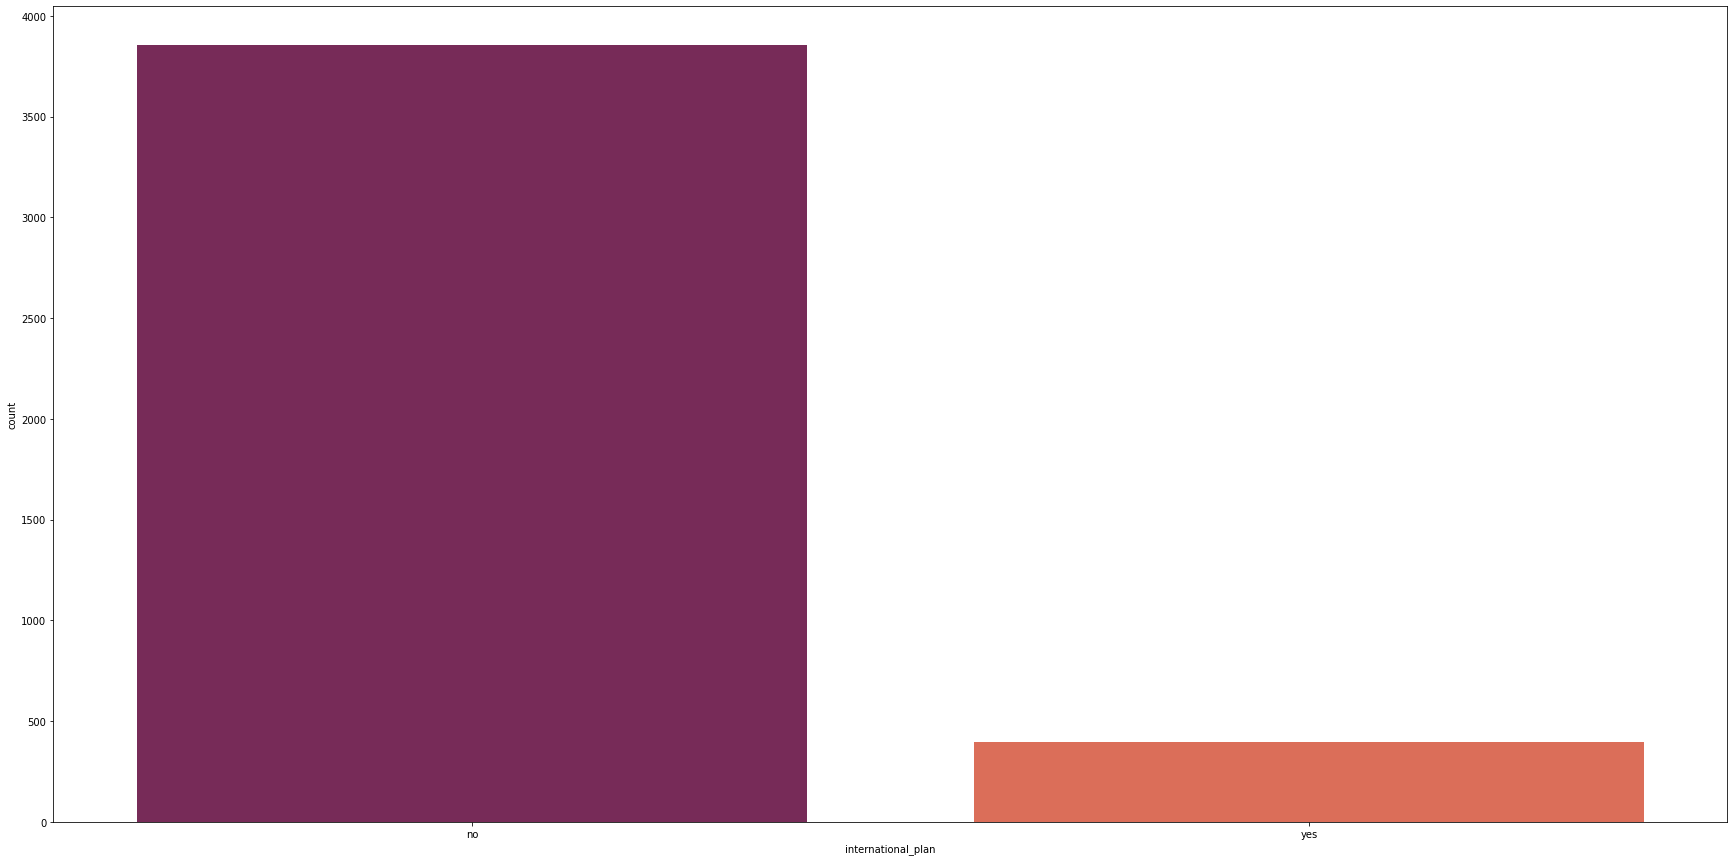

In [17]:
sns.countplot(train['international_plan'], palette = 'rocket')

In [18]:
train['voice_mail_plan'].value_counts()

no     3138
yes    1112
Name: voice_mail_plan, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='voice_mail_plan', ylabel='count'>

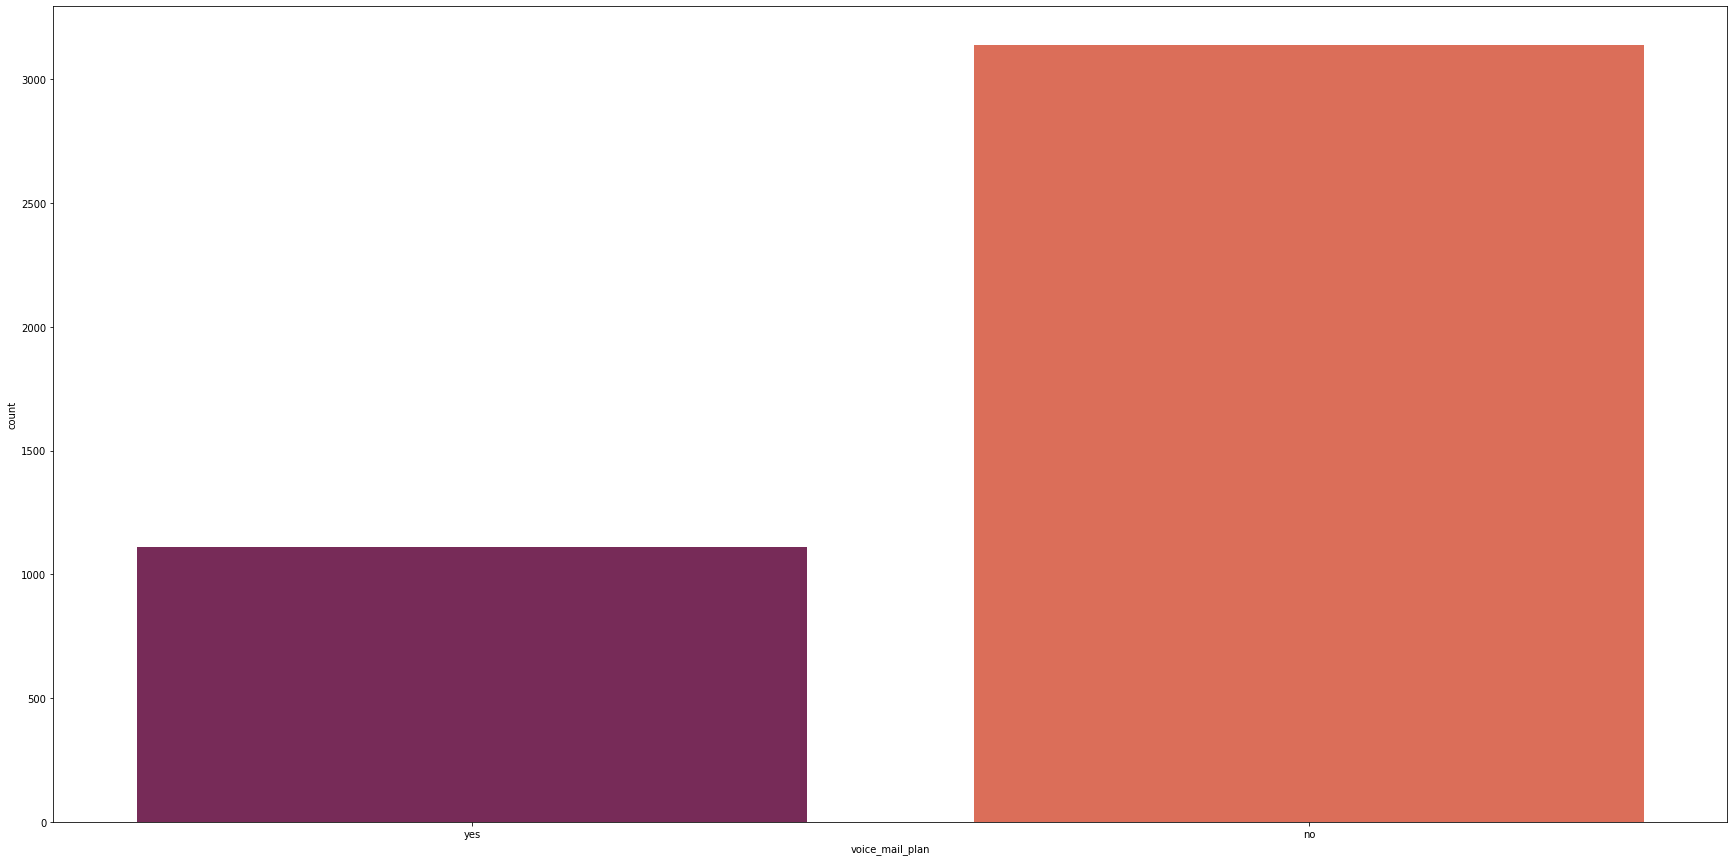

In [19]:
sns.countplot(train['voice_mail_plan'], palette = 'rocket')

<AxesSubplot:xlabel='churn', ylabel='count'>

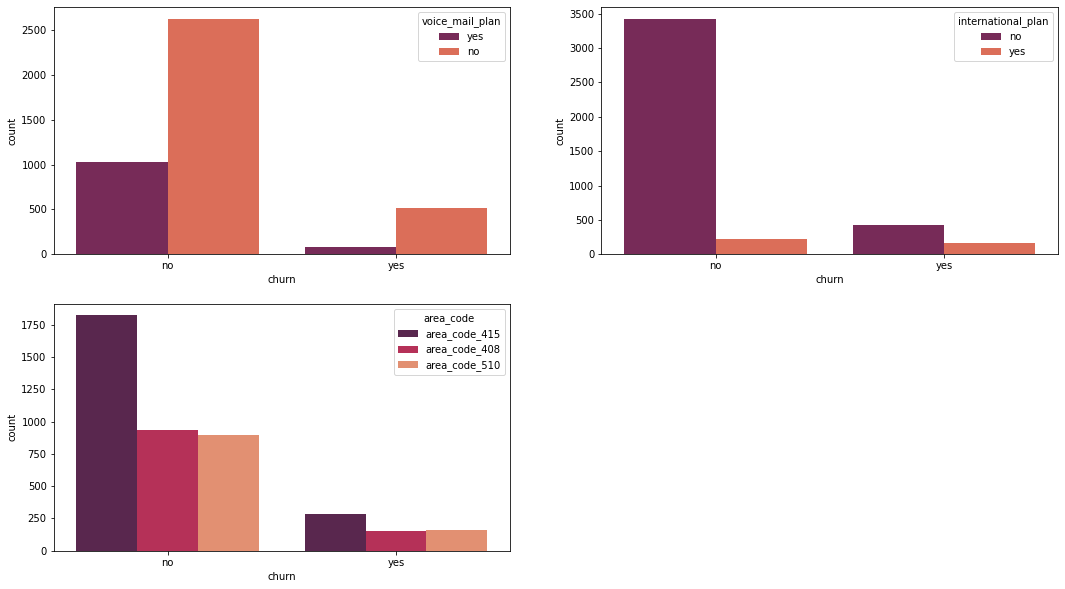

In [20]:
plt.rcParams['figure.figsize'] = (18,10)
plt.subplot(2, 2, 1)
sns.countplot(x ="churn", hue = train['voice_mail_plan'], data = train, palette = "rocket")

plt.rcParams['figure.figsize'] = (18,10)
plt.subplot(2, 2, 2)
sns.countplot(x ="churn", hue = train['international_plan'], data = train, palette = "rocket")

plt.rcParams['figure.figsize'] = (18,10)
plt.subplot(2, 2, 3)
sns.countplot(x ="churn", hue = train['area_code'], data = train, palette = "rocket")

From diagrams above, we can conclude if customers who not churn had mayority in dataset than customers who actually churn. 

1. Customers who not churn had not voice mail plan setting with the provider.
2. The most of customer who not churn is not take international plan with the provider.
3. Customer who not churn had dominant on area code than who is actually churn.

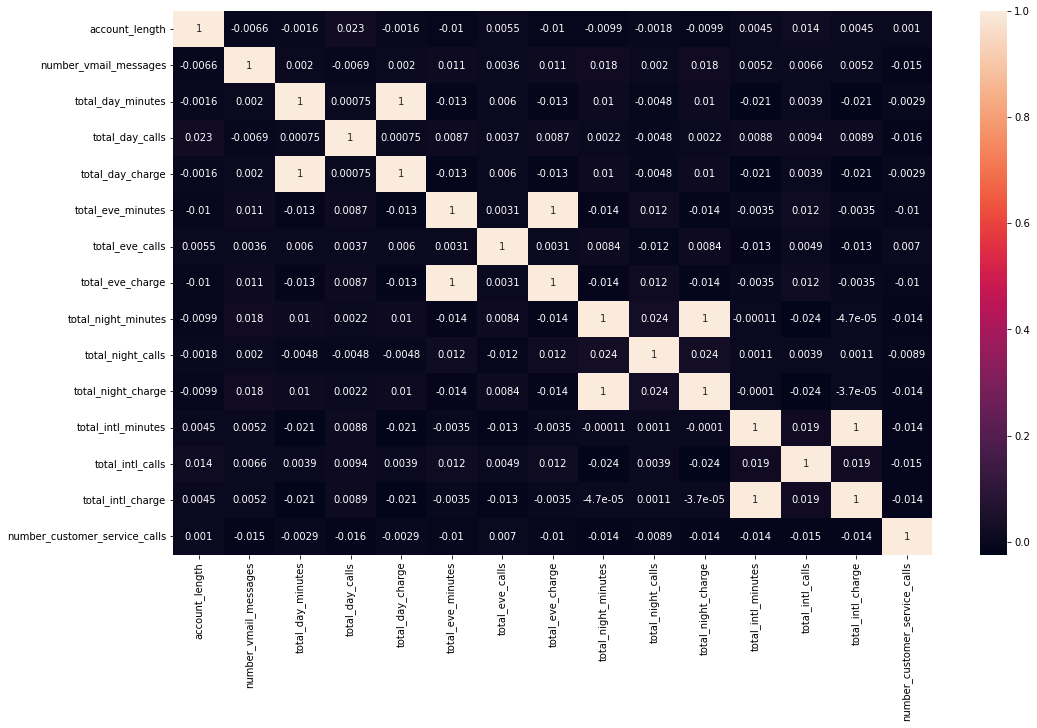

In [21]:
plt.figure(figsize=(17,10))
sns.heatmap(train.corr(),annot=True)
plt.show()

From plot above, we can conclude that dataset had several columns with strong correlation which is had one score. Those columns is:
1. total_day_charge and total_day_minutes
2. total_eve_charge and total_eve_minutes
3. total_night_charge and total_night_minutes
4. total_intl_charge and total_intl_minutes
With strong correlation, we can remove one of column.

In [22]:
del train['total_day_minutes']
del train['total_eve_minutes']
del train['total_night_minutes']
del train['total_intl_minutes']

And then dataset test follow to remove these columns

In [23]:
del test['total_day_minutes']
del test['total_eve_minutes']
del test['total_night_minutes']
del test['total_intl_minutes']

In [24]:
train.shape

(4250, 16)

In [25]:
test.shape

(750, 16)

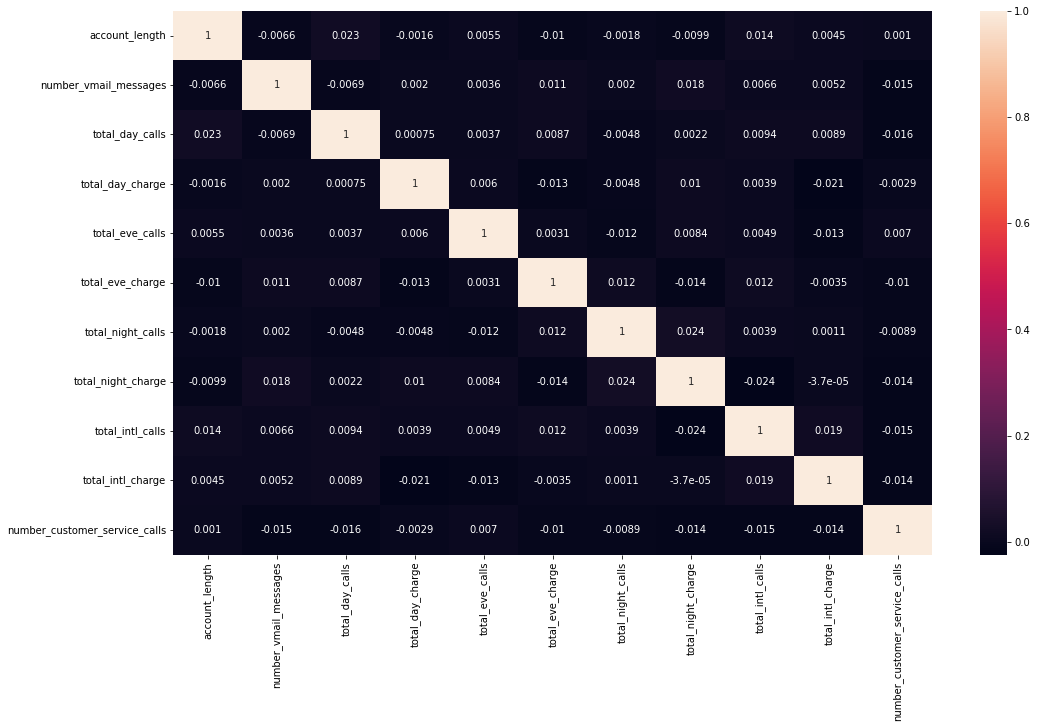

In [26]:
plt.figure(figsize=(17,10))
sns.heatmap(train.corr(),annot=True)
plt.show()

In [27]:
numeric_data = train.select_dtypes(include=[np.number]).columns

In [28]:
len(numeric_data)

11

In [29]:
numeric_data

Index(['account_length', 'number_vmail_messages', 'total_day_calls',
       'total_day_charge', 'total_eve_calls', 'total_eve_charge',
       'total_night_calls', 'total_night_charge', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<AxesSubplot:xlabel='number_customer_service_calls', ylabel='Density'>

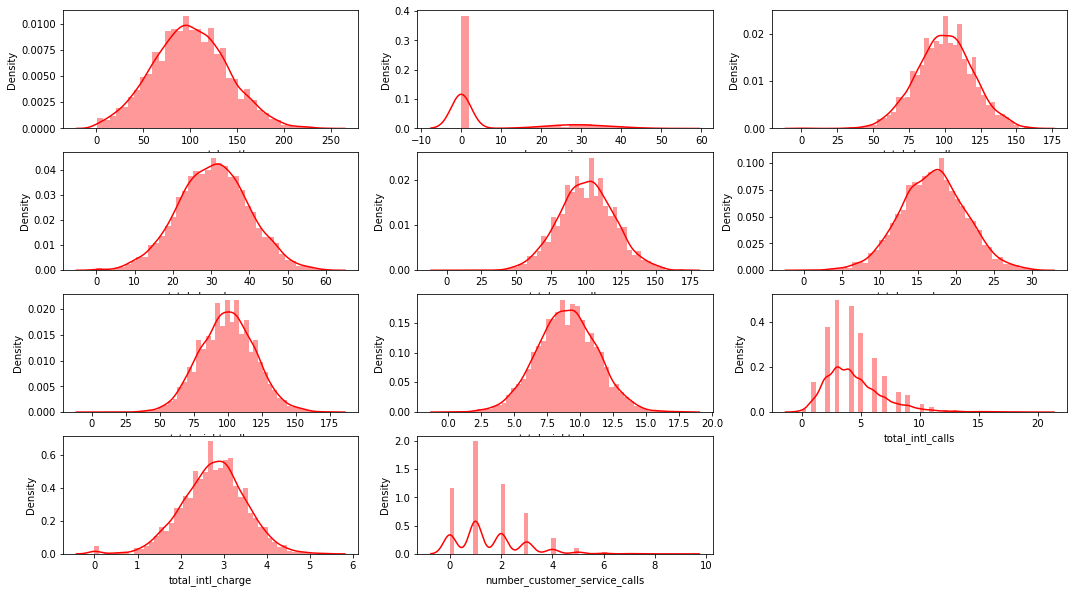

In [30]:
plt.rcParams['figure.figsize'] = (18,10)
plt.subplot(4, 3, 1)
sns.distplot(train['account_length'], color='red') 

plt.rcParams['figure.figsize'] = (18,10)
plt.subplot(4, 3, 2)
sns.distplot(train['number_vmail_messages'], color='red') 

plt.rcParams['figure.figsize'] = (18,10)
plt.subplot(4, 3, 3)
sns.distplot(train['total_day_calls'], color='red') 

plt.rcParams['figure.figsize'] = (18,10)
plt.subplot(4, 3, 4)
sns.distplot(train['total_day_charge'], color='red') 

plt.rcParams['figure.figsize'] = (18,10)
plt.subplot(4, 3, 5)
sns.distplot(train['total_eve_calls'], color='red') 

plt.rcParams['figure.figsize'] = (18,10)
plt.subplot(4, 3, 6)
sns.distplot(train['total_eve_charge'], color='red') 

plt.rcParams['figure.figsize'] = (18,10)
plt.subplot(4, 3, 7)
sns.distplot(train['total_night_calls'], color='red') 

plt.rcParams['figure.figsize'] = (18,10)
plt.subplot(4, 3, 8)
sns.distplot(train['total_night_charge'], color='red') 

plt.rcParams['figure.figsize'] = (18,10)
plt.subplot(4, 3, 9)
sns.distplot(train['total_intl_calls'], color='red') 

plt.rcParams['figure.figsize'] = (18,10)
plt.subplot(4, 3, 10)
sns.distplot(train['total_intl_charge'], color='red') 

plt.rcParams['figure.figsize'] = (18,10)
plt.subplot(4, 3, 11)
sns.distplot(train['number_customer_service_calls'], color='red') 

Conclusion = All of numeric column in dataset train is normal distribution. So, we can make normalization to make each column standart with score between 0 to 1. 

In [31]:
train[numeric_data].describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00
total_night_charge,4250.0,9.023892,2.265922,0.0,7.5225,9.02,10.5600,17.77
total_intl_calls,4250.0,4.426353,2.463069,0.0,3.0000,4.00,6.0000,20.00
total_intl_charge,4250.0,2.769654,0.745204,0.0,2.3000,2.78,3.2400,5.40


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [33]:
train[numeric_data] = scaler.fit_transform(train[numeric_data])

In [34]:
train[numeric_data].describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,0.410067,0.164043,0.0,0.297521,0.409091,0.520661,1.0
number_vmail_messages,4250.0,0.146765,0.258459,0.0,0.000000,0.000000,0.307692,1.0
total_day_calls,4250.0,0.605499,0.120308,0.0,0.527273,0.606061,0.684848,1.0
total_day_charge,4250.0,0.512796,0.153650,0.0,0.407714,0.513387,0.614960,1.0
total_eve_calls,4250.0,0.589273,0.117109,0.0,0.511765,0.588235,0.670588,1.0
total_eve_charge,4250.0,0.557139,0.139856,0.0,0.461771,0.558612,0.650540,1.0
total_night_calls,4250.0,0.570512,0.114818,0.0,0.491429,0.571429,0.645714,1.0
total_night_charge,4250.0,0.507816,0.127514,0.0,0.423326,0.507597,0.594260,1.0
total_intl_calls,4250.0,0.221318,0.123153,0.0,0.150000,0.200000,0.300000,1.0
total_intl_charge,4250.0,0.512899,0.138001,0.0,0.425926,0.514815,0.600000,1.0


And then make the same treatment for dataset test either.

In [35]:
test[numeric_data].describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,750.0,100.385333,39.699029,1.00,74.0000,101.000,126.0000,238.00
number_vmail_messages,750.0,8.454667,14.123712,0.00,0.0000,0.000,21.0000,51.00
total_day_calls,750.0,100.721333,19.718539,39.00,88.0000,101.000,114.0000,163.00
total_day_charge,750.0,30.677920,9.053756,2.13,24.9250,30.295,36.7150,59.64
total_eve_calls,750.0,100.273333,19.367535,37.00,87.0000,101.000,113.0000,164.00
total_eve_charge,750.0,17.277080,4.435638,2.65,14.1775,17.285,20.0575,30.91
total_night_calls,750.0,100.370667,19.185238,12.00,88.0000,100.500,113.0000,168.00
total_night_charge,750.0,8.982827,2.318920,2.29,7.4025,8.975,10.5650,16.39
total_intl_calls,750.0,4.485333,2.421901,0.00,3.0000,4.000,6.0000,19.00
total_intl_charge,750.0,2.779933,0.747704,0.00,2.3050,2.780,3.2700,5.10


In [36]:
test[numeric_data] = scaler.fit_transform(test[numeric_data])

In [37]:
test[numeric_data].describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,750.0,0.419347,0.167506,0.0,0.308017,0.421941,0.527426,1.0
number_vmail_messages,750.0,0.165778,0.276936,0.0,0.000000,0.000000,0.411765,1.0
total_day_calls,750.0,0.497753,0.159020,0.0,0.395161,0.500000,0.604839,1.0
total_day_charge,750.0,0.496399,0.157429,0.0,0.396366,0.489741,0.601374,1.0
total_eve_calls,750.0,0.498215,0.152500,0.0,0.393701,0.503937,0.598425,1.0
total_eve_charge,750.0,0.517590,0.156958,0.0,0.407909,0.517870,0.615977,1.0
total_night_calls,750.0,0.566479,0.122982,0.0,0.487179,0.567308,0.647436,1.0
total_night_charge,750.0,0.474669,0.164462,0.0,0.362589,0.474113,0.586879,1.0
total_intl_calls,750.0,0.236070,0.127468,0.0,0.157895,0.210526,0.315789,1.0
total_intl_charge,750.0,0.545085,0.146609,0.0,0.451961,0.545098,0.641176,1.0


After normalization numeric columns, we should change categorical column which type data object with numeric value. Or we can change all categoric columns with one hot encoding

In [38]:
categoric_data = train.select_dtypes(exclude=[np.number]).columns

In [39]:
categoric_data

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'], dtype='object')

In [40]:
train[categoric_data].nunique()

state                 51
area_code              3
international_plan     2
voice_mail_plan        2
churn                  2
dtype: int64

In [41]:
test[['state', 'area_code', 'international_plan', 'voice_mail_plan']].nunique()

state                 51
area_code              3
international_plan     2
voice_mail_plan        2
dtype: int64

In [42]:
data_train_encoded = pd.get_dummies(data = train[categoric_data], drop_first = True)
data_train_encoded

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
data_test_encoded = pd.get_dummies(data = test[['state', 'area_code', 'international_plan', 'voice_mail_plan']], drop_first = True)
data_test_encoded

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
748,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [44]:
train = pd.concat(objs = [train, data_train_encoded], axis = 1)

In [45]:
test = pd.concat(objs = [test, data_test_encoded], axis = 1)

In [46]:
train.shape

(4250, 71)

In [47]:
test.shape

(750, 70)

In [48]:
train.drop(["area_code", "international_plan", "voice_mail_plan"], axis = 1, inplace = True)

In [49]:
train.drop(['state'], axis=1, inplace=True)

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 67 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   float64
 1   number_vmail_messages          4250 non-null   float64
 2   total_day_calls                4250 non-null   float64
 3   total_day_charge               4250 non-null   float64
 4   total_eve_calls                4250 non-null   float64
 5   total_eve_charge               4250 non-null   float64
 6   total_night_calls              4250 non-null   float64
 7   total_night_charge             4250 non-null   float64
 8   total_intl_calls               4250 non-null   float64
 9   total_intl_charge              4250 non-null   float64
 10  number_customer_service_calls  4250 non-null   float64
 11  churn                          4250 non-null   object 
 12  state_AL                       4250 non-null   u

In [51]:
train[['churn','churn_yes']]

,churn,churn_yes
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0
...,...,...
4245,no,0
4246,no,0
4247,no,0
4248,no,0


In [52]:
train['churn_yes'].value_counts()

0    3652
1     598
Name: churn_yes, dtype: int64

In [53]:
train['churn'].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

In [54]:
train.drop('churn', axis=1, inplace=True)

In [55]:
test.drop(["area_code", "international_plan", "voice_mail_plan"], axis = 1, inplace = True)

In [56]:
train.shape

(4250, 66)

In [57]:
test.shape

(750, 67)

# Detect Outliers
Detect outliers in dataset train with IQR

In [58]:
numeric_data

Index(['account_length', 'number_vmail_messages', 'total_day_calls',
       'total_day_charge', 'total_eve_calls', 'total_eve_charge',
       'total_night_calls', 'total_night_charge', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls'],
      dtype='object')

In [59]:
print(f'Rows efore outlier filter: {len(train)}')

filtered_entries = np.array([True] * len(train))
for col in ['account_length', 'number_vmail_messages', 'total_day_calls',
       'total_day_charge', 'total_eve_calls', 'total_eve_charge',
       'total_night_calls', 'total_night_charge', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls']:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((train[col] >= low_limit) & (train[col] <= high_limit)) & filtered_entries
    
train = train[filtered_entries]

print(f'Rows after outlier filter: {len(train)}')

Rows efore outlier filter: 4250
Rows after outlier filter: 3513


# Split X and y variable and SMOTE
Split variable X and y to train model with dataset train and implement SMOTE to oversampling minority of dataset.

In [60]:
X = train.drop(['churn_yes'], axis = 1)
y = train['churn_yes']

print("Shape of X", X.shape)
print("Shape of y:", y.shape)

Shape of X (3513, 65)
Shape of y: (3513,)


In [61]:
train['churn_yes'].value_counts()

0    3145
1     368
Name: churn_yes, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [64]:
print("Shape of X before Oversampling", X.shape)
print("Shape of y before Oversampling:", y.shape)

print("Count of churn customer (1) before Oversampling:", sum(y_train==1))
print("Count of not churn customer (0) before Oversampling:", sum(y_train==0))

Shape of X before Oversampling (3513, 65)
Shape of y before Oversampling: (3513,)
Count of churn customer (1) before Oversampling: 304
Count of not churn customer (0) before Oversampling: 2506


In [65]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [66]:
print("Shape of X after Oversampling", X_train_res.shape)
print("Shape of y after Oversampling:", y_train_res.shape)

print("Count of churn customer (1) after Oversampling:", sum(y_train_res==1))
print("Count of not churn customer (0) after Oversampling:", sum(y_train_res==0))

Shape of X after Oversampling (5012, 65)
Shape of y after Oversampling: (5012,)
Count of churn customer (1) after Oversampling: 2506
Count of not churn customer (0) after Oversampling: 2506


In [67]:
from sklearn.metrics import confusion_matrix, classification_report

# Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
model = DecisionTreeClassifier()
model = model.fit(X_train_res, y_train_res.ravel())
y_pred = model.predict(X_test)

In [70]:
print('Training Accuracy :', model.score(X_train_res, y_train_res.ravel()))
print('Testing Accuracy :', model.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.8691322901849218



Confusion matrix:


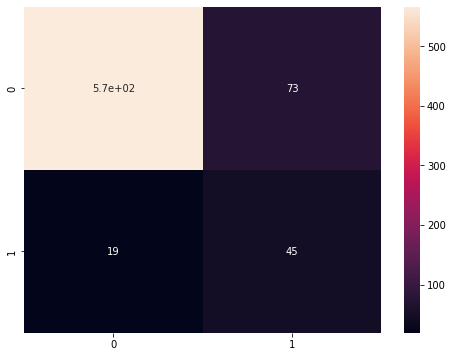

In [71]:
# confusion matrix
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.show()

In [72]:
# confusion matrix
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)


Confusion matrix:
[[566  73]
 [ 19  45]]


In [73]:
print('\nClassification report:')
cr = classification_report(y_test, y_pred)
print(cr)


Classification report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.92       639
           1       0.38      0.70      0.49        64

    accuracy                           0.87       703
   macro avg       0.67      0.79      0.71       703
weighted avg       0.91      0.87      0.89       703



# Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
logreg = LogisticRegression() 
logreg = logreg.fit(X_train_res, y_train_res.ravel())
y_pred = logreg.predict(X_test)

In [76]:
print('Training Accuracy :', logreg.score(X_train_res, y_train_res.ravel()))
print('Testing Accuracy :', logreg.score(X_test, y_test))

Training Accuracy : 0.8483639265762171
Testing Accuracy : 0.8250355618776671



Confusion matrix:


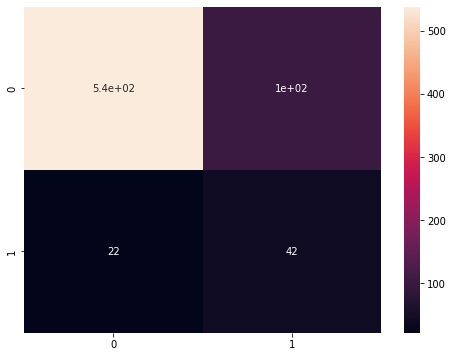

In [77]:
# confusion matrix
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.show()

In [78]:
# confusion matrix
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)


Confusion matrix:
[[538 101]
 [ 22  42]]


In [79]:
print('\nClassification report:')
cr = classification_report(y_test, y_pred)
print(cr)


Classification report:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       639
           1       0.29      0.66      0.41        64

    accuracy                           0.83       703
   macro avg       0.63      0.75      0.65       703
weighted avg       0.90      0.83      0.85       703



# Support Vector Machine (SVM)

In [80]:
from sklearn.svm import SVC

In [81]:
classifier = SVC(kernel='rbf', random_state = 0)
classifier.fit(X_train_res, y_train_res.ravel())

y_pred = classifier.predict(X_test)

In [82]:
print('Training Accuracy :', classifier.score(X_train_res, y_train_res.ravel()))  
print('Testing Accuracy :', classifier.score(X_test, y_test)) 

Training Accuracy : 0.909217877094972
Testing Accuracy : 0.8733997155049786



Confusion matrix


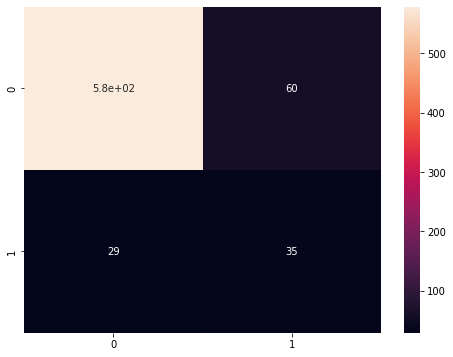

In [83]:
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.show()

In [84]:
# confusion matrix
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)


Confusion matrix:
[[579  60]
 [ 29  35]]


In [85]:
print('\nClassification report:')
cr = classification_report(y_test, y_pred)
print(cr)


Classification report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       639
           1       0.37      0.55      0.44        64

    accuracy                           0.87       703
   macro avg       0.66      0.73      0.68       703
weighted avg       0.90      0.87      0.88       703



# Conclusion
Based from 3 machine learning models that we train, the best model is both SVM and Decision Tree which are have 0.87 f1 score. But Decision Tree have much better FN score (19)

# Implement machine learning model to dataset test

**1. Using Desicion Tree model**

In [86]:
del test['state']

In [87]:
test2 = test.copy()

In [88]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 66 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   account_length                 750 non-null    float64
 2   number_vmail_messages          750 non-null    float64
 3   total_day_calls                750 non-null    float64
 4   total_day_charge               750 non-null    float64
 5   total_eve_calls                750 non-null    float64
 6   total_eve_charge               750 non-null    float64
 7   total_night_calls              750 non-null    float64
 8   total_night_charge             750 non-null    float64
 9   total_intl_calls               750 non-null    float64
 10  total_intl_charge              750 non-null    float64
 11  number_customer_service_calls  750 non-null    float64
 12  state_AL                       750 non-null    uin

In [89]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703 entries, 1676 to 2017
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 703 non-null    float64
 1   number_vmail_messages          703 non-null    float64
 2   total_day_calls                703 non-null    float64
 3   total_day_charge               703 non-null    float64
 4   total_eve_calls                703 non-null    float64
 5   total_eve_charge               703 non-null    float64
 6   total_night_calls              703 non-null    float64
 7   total_night_charge             703 non-null    float64
 8   total_intl_calls               703 non-null    float64
 9   total_intl_charge              703 non-null    float64
 10  number_customer_service_calls  703 non-null    float64
 11  state_AL                       703 non-null    uint8  
 12  state_AR                       703 non-null   

In [90]:
del test2['id']

In [91]:
test2.shape

(750, 65)

In [92]:
X_test.shape

(703, 65)

In [93]:
result_dtc = model.predict(test2)

In [94]:
df_result_dtc = pd.DataFrame({'id': test.id, 'churn': result_dtc})

In [95]:
df_result_dtc.head()

,id,churn
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [96]:
df_result_dtc['churn'].value_counts()

0    467
1    283
Name: churn, dtype: int64

<AxesSubplot:ylabel='churn'>

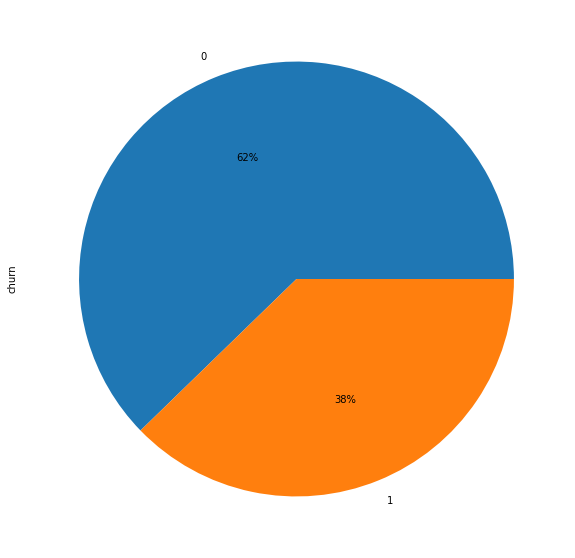

In [97]:
df_result_dtc['churn'].value_counts().plot(kind='pie', autopct='%1.0f%%')

**2. Using SVM**

In [98]:
result_svm = classifier.predict(test2)

In [99]:
df_result_svm = pd.DataFrame({'id': test.id, 'churn': result_svm})

In [100]:
df_result_svm.head()

,id,churn
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [101]:
df_result_svm['churn'].value_counts()

0    676
1     74
Name: churn, dtype: int64

<AxesSubplot:ylabel='churn'>

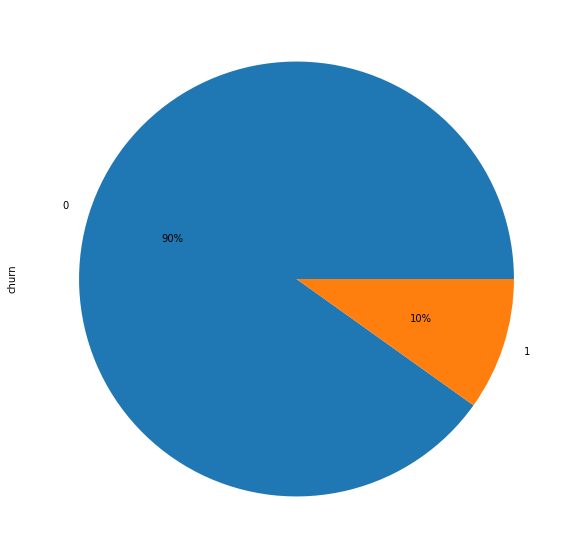

In [102]:
df_result_svm['churn'].value_counts().plot(kind='pie', autopct='%1.0f%%')